In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import glob as glob
plt.style.use('seaborn-talk')
def customaxis(ax, c_left='k', c_bottom='k', c_right='none', c_top='none',
               lw=3, size=12, pad=8):

    for c_spine, spine in zip([c_left, c_bottom, c_right, c_top],
                              ['left', 'bottom', 'right', 'top']):
        if c_spine != 'none':
            ax.spines[spine].set_color(c_spine)
            ax.spines[spine].set_linewidth(lw)
        else:
            ax.spines[spine].set_color('none')
    if (c_bottom == 'none') & (c_top == 'none'): # no bottom and no top
        ax.xaxis.set_ticks_position('none')
    elif (c_bottom != 'none') & (c_top != 'none'): # bottom and top
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                      color=c_bottom, labelsize=size, pad=pad)
    elif (c_bottom != 'none') & (c_top == 'none'): # bottom but not top
        ax.xaxis.set_ticks_position('bottom')
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                       color=c_bottom, labelsize=size, pad=pad)
    elif (c_bottom == 'none') & (c_top != 'none'): # no bottom but top
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                       color=c_top, labelsize=size, pad=pad)
    if (c_left == 'none') & (c_right == 'none'): # no left and no right
        ax.yaxis.set_ticks_position('none')
    elif (c_left != 'none') & (c_right != 'none'): # left and right
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_left, labelsize=size, pad=pad)
    elif (c_left != 'none') & (c_right == 'none'): # left but not right
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_left, labelsize=size, pad=pad)
    elif (c_left == 'none') & (c_right != 'none'): # no left but right
        ax.yaxis.set_ticks_position('right')
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_right, labelsize=size, pad=pad)

### Filtering benchmarks
* This is not run-specific
* Happens on the basis of individual assays
* Will show the filtering of 1970 HD assays
* This will at least highlight the places where we see bottlenecks in pipeline

In [227]:
filtering = glob.glob('../filter_benchmarks/*/777962.170519.1970.HD.txt')

In [228]:
pstep = [xx.split('/')[2] for xx in filtering]
filtering

['../filter_benchmarks/duplicates_filtered/777962.170519.1970.HD.txt',
 '../filter_benchmarks/filter_hwe_variants/777962.170519.1970.HD.txt',
 '../filter_benchmarks/filter_individuals/777962.170519.1970.HD.txt',
 '../filter_benchmarks/filter_variants/777962.170519.1970.HD.txt',
 '../filter_benchmarks/hwe_stats/777962.170519.1970.HD.txt',
 '../filter_benchmarks/impute_sex/777962.170519.1970.HD.txt',
 '../filter_benchmarks/individual_stats/777962.170519.1970.HD.txt',
 '../filter_benchmarks/variant_stats/777962.170519.1970.HD.txt']

In [229]:
steps = []
for xx in filtering:
    bm = pd.read_table(xx, index_col = None, header = 0)
    steps.append(bm)
filt = pd.concat(steps)

In [230]:
filt.index = pstep
filt.replace(np.NaN, '-')

,h:m:s,io_in,io_out,max_pss,max_rss,max_uss,max_vms,mean_load,s
duplicates_filtered,0:03:43.113061,-,-,-,-,-,-,-,223.113061
filter_hwe_variants,0:00:08,0,376.94,56.23,57.21,56.21,258535,32.31,8.281800
filter_individuals,0:00:11,0,374.38,47.17,48.61,46.71,258535,27.85,11.409800
filter_variants,0:02:21,0,50.27,364.62,365.61,364.61,258535,78.73,141.332100
hwe_stats,0:00:05,0,63.23,53.43,54.42,53.42,258535,36.49,5.730800
impute_sex,0:00:08,0,377.12,47.57,48.55,47.55,258535,26.55,8.931300
individual_stats,0:00:07,0,31.8,27.66,28.64,27.64,258535,28.4,7.250500
variant_stats,0:02:18,0,44.78,365.48,366.47,365.47,258535,81.26,138.783300


In [231]:
filt

,h:m:s,io_in,io_out,max_pss,max_rss,max_uss,max_vms,mean_load,s
duplicates_filtered,0:03:43.113061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.113061
filter_hwe_variants,0:00:08,0.0,376.94,56.23,57.21,56.21,258535.27,32.31,8.281800
filter_individuals,0:00:11,0.0,374.38,47.17,48.61,46.71,258535.28,27.85,11.409800
filter_variants,0:02:21,0.0,50.27,364.62,365.61,364.61,258535.27,78.73,141.332100
hwe_stats,0:00:05,0.0,63.23,53.43,54.42,53.42,258535.26,36.49,5.730800
impute_sex,0:00:08,0.0,377.12,47.57,48.55,47.55,258535.28,26.55,8.931300
individual_stats,0:00:07,0.0,31.80,27.66,28.64,27.64,258535.26,28.40,7.250500
variant_stats,0:02:18,0.0,44.78,365.48,366.47,365.47,258535.27,81.26,138.783300


### Benchmarks for NON-Impute2 steps (Phasing + Imputation)
* Separate step needed to glob search for and add Impute2 chunks for this single chromosome
* Performed this with run 1 and run 2
* Some have all of the desired stats, others don't
* Eagle phasing run with 8 cores -- do I need to transform this in some way?

In [232]:
run2 = glob.glob('./*/run2/snp50.chr20.benchmark.txt') #all of the non-Impute2 steps

In [233]:
run2

['./cat_chunks/run2/snp50.chr20.benchmark.txt',
 './decompress/run2/snp50.chr20.benchmark.txt',
 './eagle_phased_assays/run2/snp50.chr20.benchmark.txt',
 './impute2_vcf/run2/snp50.chr20.benchmark.txt',
 './imp_acc/run2/snp50.chr20.benchmark.txt']

In [234]:
name = [xx.split('/')[1] for xx in run2]

In [235]:
steps = []
for xx in run2:
    bm = pd.read_table(xx, index_col = None, header = 0)
    steps.append(bm)
combined = pd.concat(steps)

In [236]:
range(1,31)combined.index = name

In [237]:
combined # Why do all of these stats not have complete stats?

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
cat_chunks,2.1379,0:00:02,1.79,206.22,0.32,0.36,0,115.76,13.11
decompress,11.3572,0:00:11,-,-,-,-,-,-,0.00
eagle_phased_assays,67.9663,0:01:07,166.48,1488.49,157,157.24,0,0.01,622.14
impute2_vcf,26.5016,0:00:26,-,-,-,-,-,-,0.00
imp_acc,24.1628,0:00:24,1557.82,2295.15,1586.05,1587.88,0,0.02,0.00


### Impute2 Chunk Benchmarks

In [238]:
ref = glob.glob('./impute2*/run2/merged*.chr20.*.benchmark.txt')
run2imp = glob.glob('./impute2*/run2/snp50.chr20.*.benchmark.txt')
chrom = []
for xx in ref:
    df = pd.read_table(xx, index_col = None, header = 0)
    chrom.append(df)
for xx in run2imp:
    df = pd.read_table(xx, index_col = None, header = 0)
    chrom.append(df)
combinedimp = pd.concat(chrom)
hapleg = pd.read_table('./hap_leg/run2/snp50.chr20.phased.benchmark.txt', index_col = None, header = 0)
hapleg.index = ['hap_leg']

In [239]:
comb = ref + run2imp

In [240]:
combinedimp.index = [xx.split('/')[1]+'_chunk' + xx.split('.')[3] for xx in comb]
combinedimp = combinedimp.append(hapleg)

In [241]:
combinedimp

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
impute2_refpanel_chunk0,10.5865,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk1,9.9534,0:00:09,-,-,-,-,-,-,0.00
impute2_refpanel_chunk10,10.5814,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk11,10.7784,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk12,10.3073,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk13,10.7416,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk2,10.8164,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk3,10.3999,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk4,10.8795,0:00:10,-,-,-,-,-,-,0.00
impute2_refpanel_chunk5,6.6437,0:00:06,25.47,133.53,23.26,23.37,0,0.01,0.00


### Combined Filtering, Phasing, and Imputation Benchmarks Dataframe

In [242]:
order = ['duplicates_filtered', 'variant_stats', 'filter_variants', 'individual_stats', 'hwe_stats', 'filter_hwe_variants', 'impute_sex', 'eagle_phased_assays', 'decompress', 'hap_leg', 'impute2_refpanel_chunk0','impute2_refpanel_chunk1','impute2_refpanel_chunk2','impute2_refpanel_chunk3','impute2_refpanel_chunk4','impute2_refpanel_chunk5','impute2_refpanel_chunk6','impute2_refpanel_chunk7','impute2_refpanel_chunk8','impute2_refpanel_chunk9','impute2_refpanel_chunk10','impute2_refpanel_chunk11','impute2_refpanel_chunk12','impute2_refpanel_chunk13', 'impute2_chunk0', 'impute2_chunk1', 'impute2_chunk2', 'impute2_chunk3', 'impute2_chunk4', 'impute2_chunk5', 'impute2_chunk6', 'impute2_chunk7', 'impute2_chunk8', 'impute2_chunk9', 'impute2_chunk10', 'impute2_chunk11', 'impute2_chunk12', 'impute2_chunk13','cat_chunks', 'impute2_vcf', 'imp_acc']

In [243]:
allsteps = filt.append(combined).append(combinedimp)
allsteps = allsteps.reindex(order)

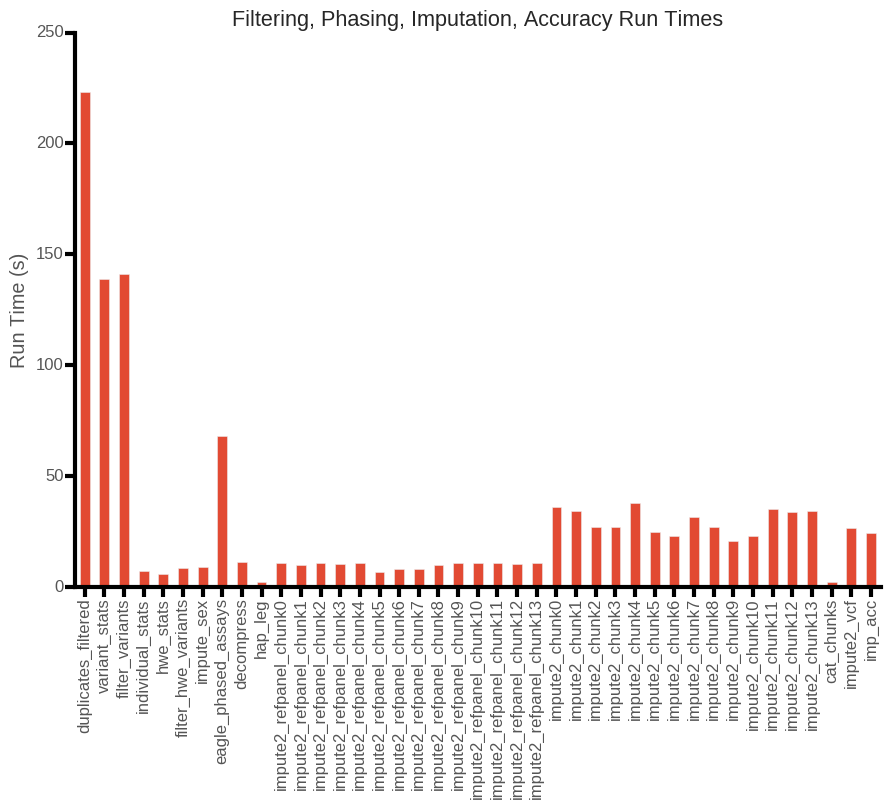

In [244]:
ax = allsteps.s.plot(kind='bar',title ='Filtering, Phasing, Imputation, Accuracy Run Times')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('')
ax.set_ylabel('Run Time (s)')

# Run-time Comparisons

In [253]:
with open('./eagle_phased_assays/run2/snp50.chr20.benchmark.txt', 'r') as bm:
    bench = bm.readlines()[1].split('\t')[0]

In [310]:
run1 = glob.glob('./*/run2/*.txt')

In [311]:
num = 0
for xx in run1:
    with open(xx, 'r') as bm:
        time = float(bm.readlines()[1].split('\t')[0])
        num +=time

* This analysis looks only at the runs that do phasing + imputation 
* As a result excludes any Minimac runs
* Would be worthwhile to do benchmarking for different steps with each run (i.e. a bar graph with different colored run-time bars for each different step

In [5]:
abc = [1,2,4,6,7,9,12,13,14]

In [6]:
rundict = {}
for xx in abc:
    runs = glob.glob('./*/run' + str(xx) +'/*.txt')
    index = 'run'+ str(xx)
    num = 0
    for xx in runs:
        with open(xx, 'r') as bm:
            time = float(bm.readlines()[1].split('\t')[0])
            num += time
    rundict[index] = num

In [30]:
# rundict['bigcow'] = 12631164.49

xyz = ['run1','run2','run4','run6','run7','run9','run12','run13','run14']

In [31]:
runtimes = (pd.DataFrame.from_dict(rundict, orient='index')
           .drop('run3')
           .reindex(xyz))


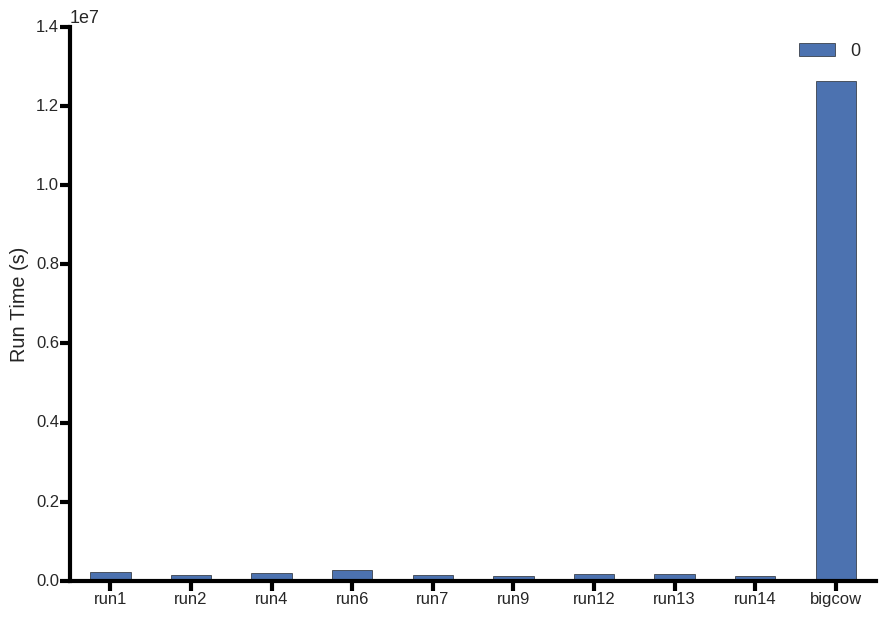

In [32]:
ax = runtimes.plot(kind = 'bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('')
ax.set_ylabel('Run Time (s)')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)

In [296]:
runlist = list(range(1,31))
abc = []
for i in runlist:
    runs = glob.glob('./*/run'+str(i)+'/*.txt')
    for xx in runs:
        abc.append(xx)

In [28]:
bigcow = glob.glob('../../../170616_HDF250/Imputation_Project/benchmarks/*/run21/*.txt')
num = 0
for xx in bigcow:
    with open(xx, 'r') as bm:
        time = float(bm.readlines()[1].split('\t')[0])
        num +=time

In [2]:
bigphasing = glob.glob('../../../170616_HDF250/Imputation_Project/benchmarks/eagle_merged/run22/*.txt')

In [4]:
num = 0
for xx in bigphasing:
    with open(xx, 'r') as bm:
        time = float(bm.readlines()[1].split('\t')[0])
        num +=time

In [5]:
num

1849216.4152

## Benchmarks for runs, broken into individual steps
#### * Phasing (of whatever type)
#### * Refpanel generation
#### * Imutation
#### * Imputation Accuracy Calculations? Maybe

### Which benchmark steps should be combined for each step?
* Minimac: reformat_leg, cat_sample, ref_panel_vcf, cat_vcfs, vcf_convert, minimac
* Impute2: impute2_refpanel (all chunks), impute2 (all chunks)
* Impute4: impute2_refpanel (all chunks), impute4 (all chunks)

* Eagle (separate): eagle_phased_assays, hap_leg (maybe?)
* Eagle (combined): eagle_merged, eagle_merged_vcf, bgzip_vcf, make_vcf_extract_lists, vcf_per_assay, vcf_to_hap, vcf_to_haps
* ShapeIt (separate): shapeit_phased_assays, hap_leg (maybe?)

In [2]:
# Set up lists that can point to the correct benchmark locations based on run number
# Also, concatenate the runtimes for combined phasing processes

mm = ['merged_refpanel', 'cat_sample', 'ref_panel_vcf', 'cat_vcfs', 'vcf_convert', 'minimac']
i2 = ['imput2_refpanel', 'impute2']
i4 = ['imput2_refpanel', 'impute4']

es = ['eagle_phased_assays']
ec = ['eagle_merged', 'eagle_merged_vcf', 'bgzip_vcf', 'make_vcf_extract_lists', 'vcf_per_assay', 'vcf_to_hap', 'vcf_to_haps']
si = ['shapeit_phased_assays']

minimac = ['5','8','10','15','16'] #Coded as 1
impute2 = ['1','2','4','7','6','9','12','13','14','21'] #Coded as 2
impute4 = ['17', '18', '19', '30', '31'] #Coded as 3

eagle_assay = ['2', '5', '7', '10', '13', '15']
eagle_combined = ['1', '6', '8', '11', '12', '16']
shapeit = ['4', '9', '14', '17', '18', '19']

In [3]:
import itertools

In [4]:
runs = ['run'+str(xx) for xx in list(range(1, 21))]
benchmarks = pd.DataFrame({'phasing':list(itertools.repeat(np.NaN,20)),'imputation':list(itertools.repeat(np.NaN,20)), 'imp_method':list(itertools.repeat(np.NaN,20)), 'phasing_method':list(itertools.repeat(np.NaN,20))})
benchmarks.index = runs
rundict = {}
benchmarks
for run in runs:
    imputetime = 0
    if run.strip('run') in minimac:
        bms = [glob.glob('./'+xx+'/'+run+'/*.benchmark.txt') for xx in mm]
        for file in bms[2]:
            with open(file, 'r') as bm:
                time = float(bm.readlines()[1].split('\t')[0])
                imputetime += time
        imp_method = 1.0
    if run.strip('run') in impute2:
        bms = [glob.glob('./'+xx+'/'+run+'/*.benchmark.txt') for xx in i2]
        for file in bms[1]:
            with open(file, 'r') as bm:
                time = float(bm.readlines()[1].split('\t')[0])
                imputetime += time
        imp_method = 2.0
    if run.strip('run') in impute4:
        bms = [glob.glob('./'+xx+'/'+run+'/*.benchmark.txt') for xx in i4]
        for file in bms[1]:
            with open(file, 'r') as bm:
                time = float(bm.readlines()[1].split('\t')[0])
                imputetime += time
        imp_method = 3.0
    benchmarks.set_value(run, 'imputation', imputetime/3600)
    benchmarks.set_value(run, 'imp_method', imp_method)


In [5]:
for run in runs:
    phasingtime = 0
    if run.strip('run') in eagle_assay:
        bms = [glob.glob('./'+xx+'/'+run+'/*.benchmark.txt') for xx in es]
        for file in bms[0]:
            with open(file, 'r') as bm:
                time = float(bm.readlines()[1].split('\t')[0])
                phasingtime += time
        phasing_method = 4.0
    if run.strip('run') in eagle_combined:
        bms = [glob.glob('./'+xx+'/'+run+'/*.benchmark.txt') for xx in ec]
        for file in bms[0]:
            with open(file, 'r') as bm:
                time = float(bm.readlines()[1].split('\t')[0])
                phasingtime += time
        phasing_method = 5.0
    if run.strip('run') in shapeit:
        bms = [glob.glob('./'+xx+'/'+run+'/*.benchmark.txt') for xx in si]
        for file in bms[0]:
            with open(file, 'r') as bm:
                time = float(bm.readlines()[1].split('\t')[0])
                phasingtime += time
        phasing_method = 6.0
    benchmarks.set_value(run, 'phasing', phasingtime/3600)
    benchmarks.set_value(run, 'phasing_method', phasing_method)

In [6]:
benchmarks = benchmarks.drop('run3').drop('run11').drop('run20')
im = {1.0:'minimac', 2.0:'impute2', 3.0:'impute4'} #, '1':'minimac', '2':'impute2', '3':'impute4'}
pm = {4.0:'eagle_separate', 5.0:'eagle_combined', 6.0:'shapeit'}
benchmarks = benchmarks.replace({"imp_method":im, "phasing_method":pm})

In [7]:
benchmarks

,imp_method,imputation,phasing,phasing_method
run1,impute2,38.876519,5.205193,eagle_combined
run2,impute2,34.278381,2.864570,eagle_separate
run4,impute2,33.966025,13.252404,shapeit
run5,minimac,8.192352,0.000000,eagle_separate
run6,impute2,48.597722,5.023147,eagle_combined
run7,impute2,23.573710,3.058538,eagle_separate
run8,minimac,5.675650,0.000000,eagle_combined
run9,impute2,16.986691,13.322298,shapeit
run10,minimac,5.797060,0.000000,eagle_separate
run12,impute2,27.101316,7.771492,eagle_combined


In [8]:
!pwd

/CIFS/MUG01_N/deckerje/tnr343/170519_hol/Imputation_Project/benchmarks


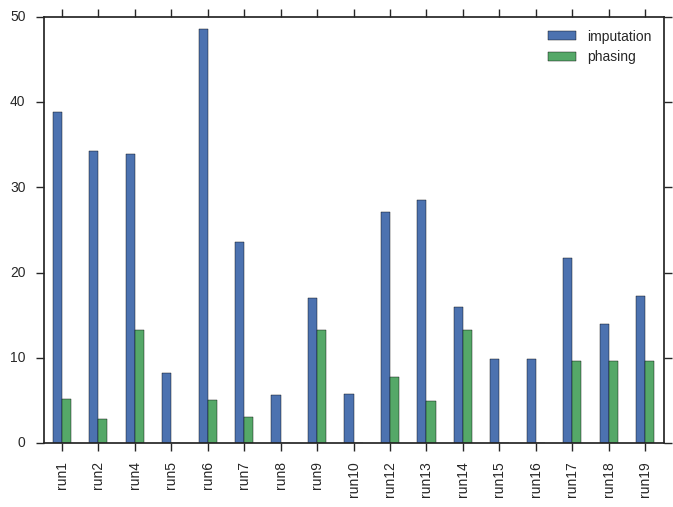

In [119]:
benchmarks.plot(kind = 'bar')


# R for plotting

In [1]:
read.table(benchmarks)

ERROR: Error in read.table(benchmarks): object 'benchmarks' not found
